# Applications and Exercises Overview

This notebook provides an overview of various practical applications and exercises that combine multiple OpenCV techniques to solve specific computer vision problems.
> 1. https://docs.opencv.org/4.x/d2/d64/tutorial_table_of_content_objdetect.html 
> 2. https://docs.opencv.org/4.x/d6/de2/tutorial_py_table_of_contents_ml.html

### Table of Contents

- [Introduction](#Introduction)
- [1. Interactive Tools](#1.-Interactive-Tools)
- [2. Shape Detection](#2.-Shape-Detection)
- [3. Motion Detection](#3.-Motion-Detection)
- [4. Skin Color Detection](#4.-Skin-Color-Detection)
- [5. Object Tracking Simulation](#5.-Object-Tracking-Simulation)
- [6. Image Comparison](#6.-Image-Comparison)

### Introduction

The examples in this directory demonstrate how to integrate various image processing and feature detection techniques into more complex applications. These scripts provide hands-on experience in building functional computer vision solutions.

In [15]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

root = os.getcwd()
imagePath = os.path.join(root,'..' ,'_assets')

## 1. Interactive Tools

These tools allow users to interact with the image processing pipeline in real-time. Since interactive elements (`cv2.imshow` and trackbars) don't embed directly into static notebook cells, we show a representative static output and link to the full interactive script.

### HSV Color Calibration Tool (Static Demo)
This demo shows the result of applying an HSV color mask to an image using a predefined color range, simulating the output of the interactive tool.

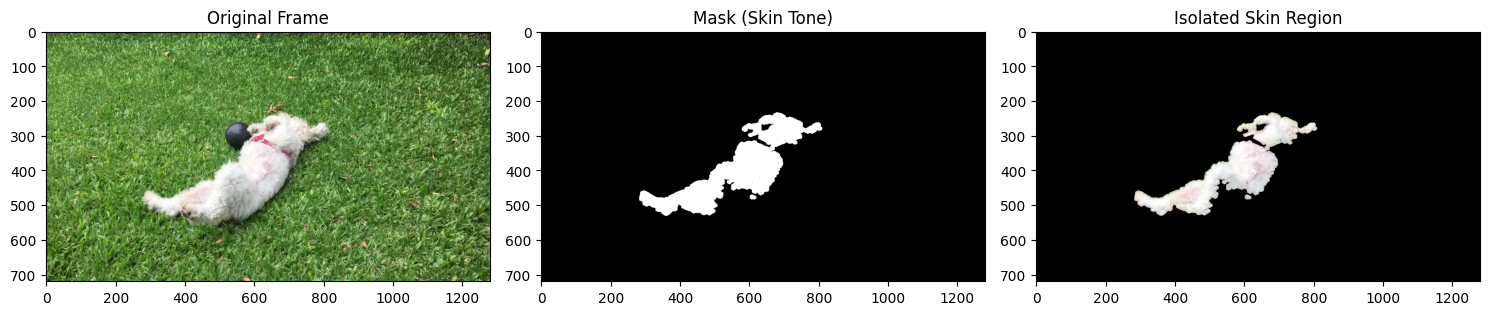

In [4]:
img_path = os.path.join(imagePath, "dog.mp4")

cap = cv2.VideoCapture(img_path)
if not cap.isOpened():
    print(f"Error: Could not open video {img_path}")
else:
    ret, frame = cap.read()

cap.release()

if ret and frame is not None:
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Tipik başlangıç skin aralığı (ayarlamaya açık):
    lower_white = np.array([0, 0, 200], dtype=np.uint8)
    upper_white = np.array([179, 40, 255], dtype=np.uint8)

    # Maske oluştur
    mask = cv2.inRange(hsv_frame, lower_white, upper_white)

    # Maske temizliği: küçük lekeleri kaldır, kenarları düzgünleştir
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=1)

    # Maske ile izole et
    result_frame = cv2.bitwise_and(frame, frame, mask=mask)

    # Görüntüleri matplotlib için RGB'ye çevir
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result_rgb = cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(frame_rgb)
    axes[0].set_title("Original Frame")

    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title("Mask (Skin Tone)")

    axes[2].imshow(result_rgb)
    axes[2].set_title("Isolated Skin Region")

    plt.tight_layout()
    plt.show()
else:
    print("Could not load frame for static demo.")

**Full Interactive Script:** For the interactive webcam tool, see [`examples/01_hsv_calibration_tool.py`](examples/01_hsv_calibration_tool.py).

### Mouse Drawing on Video (Static Demo)
This demo shows how drawn elements would appear on a video frame after a mouse click event.

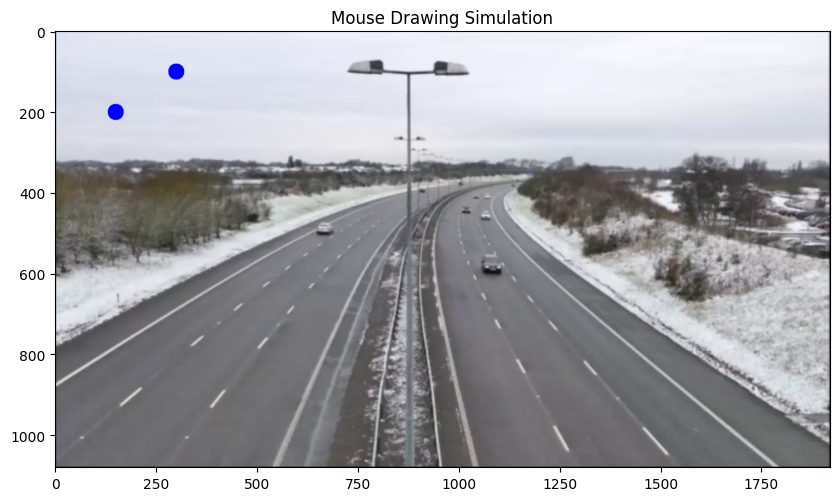

In [5]:
img_path = os.path.join(imagePath, "car.mp4")

cap = cv2.VideoCapture(img_path)
if not cap.isOpened():
    print(f"Error: could not open: {img_path}")
else:
    ret, frame = cap.read()

cap.release()

if ret and frame is not None:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    cv2.circle(frame_rgb, (150, 200), 20, (0, 0, 255), -1)
    cv2.circle(frame_rgb, (300, 100), 20, (0, 0, 255), -1)

    plt.figure(figsize=(10, 8))
    plt.imshow(frame_rgb)
    plt.title("Mouse Drawing Simulation")

    plt.show()
else:
    print("Could not load frame for static demo.")

**Full Interactive Script:** For the interactive mouse drawing tool, see [`examples/02_mouse_drawing.py`](examples/02_mouse_drawing.py).

## 2. Shape Detection

Scripts for identifying basic geometric shapes in images and video streams.

### Static Shape Detection
Recognizes shapes like triangles, rectangles, squares, and circles in still images.

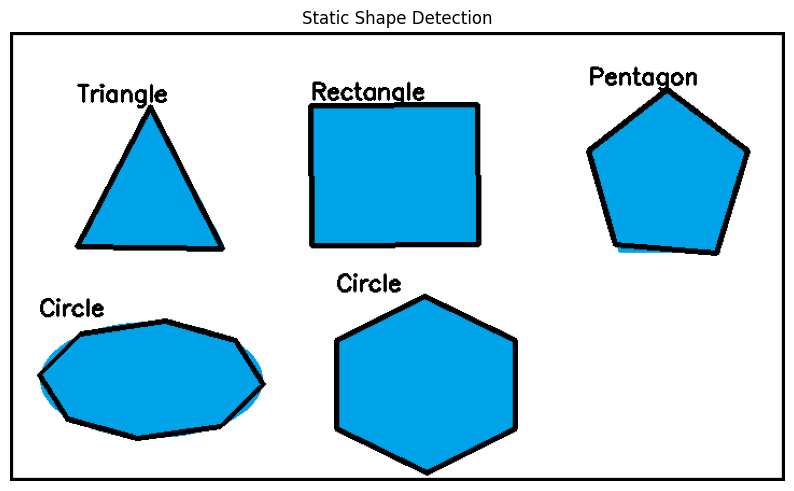

In [8]:
img_path = os.path.join(imagePath, "polygons.png")

def detect_and_label_shapes(image):
    """Finds contours, approximates their shape, and labels them."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
    
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        if cv2.contourArea(cnt) < 100:
            continue
        epsilon = 0.02 * cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)
        cv2.drawContours(image, [approx], 0, (0, 0, 0), 3)
        x, y, w, h = cv2.boundingRect(approx)
        
        shape_name = ""
        num_vertices = len(approx)
        if num_vertices == 3:
            shape_name = "Triangle"
        elif num_vertices == 4:
            aspect_ratio = float(w) / h
            if 0.95 <= aspect_ratio <= 1.05:
                shape_name = "Square"
            else:
                shape_name = "Rectangle"
        elif num_vertices == 5:
            shape_name = "Pentagon"
        else:
            shape_name = "Circle"
        cv2.putText(image, shape_name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
            
    return image

image = cv2.imread(img_path)
if image is not None:
    result_image = detect_and_label_shapes(image.copy())
    result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 8))
    plt.imshow(result_image_rgb)
    plt.title("Static Shape Detection")
    plt.axis('off')
    plt.show()
else:
    print("Could not load image for static demo.")

**Full Script:** For a live version, see [`examples/03_static_shape_detection.py`](examples/03_static_shape_detection.py).

### Real-time Shape Detection
This is an interactive application that works on a live webcam feed. We show a representative static output here.

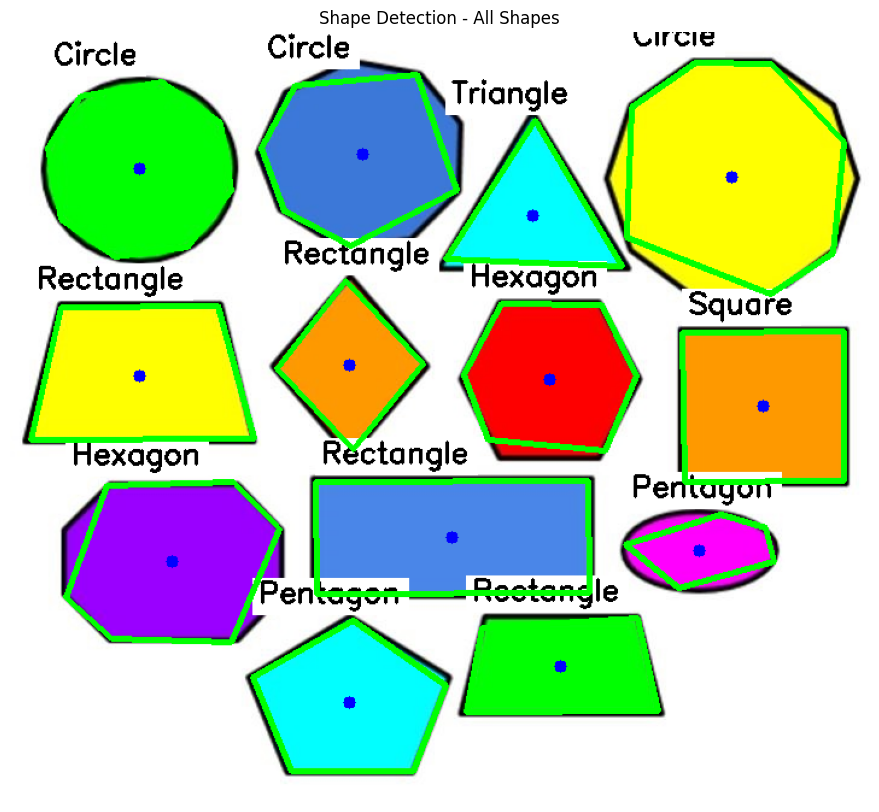

Tespit edilen şekil sayısı: 13


In [10]:
img_path = os.path.join(imagePath, "polygons2.jpg")
frame = cv2.imread(img_path)

if frame is not None:
    # Renk aralığını genişlet - daha fazla rengi yakala
    lower_color = np.array([0, 50, 50])
    upper_color = np.array([180, 255, 255])

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Morfolojik işlemler
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Kontur bulma
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    result_frame = frame.copy()
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 300:  # Minimum alan eşiği düşürüldü
            # Kontur yaklaşıklama
            perimeter = cv2.arcLength(cnt, True)
            epsilon = 0.04 * perimeter  # Daha agresif yaklaşıklama
            approx = cv2.approxPolyDP(cnt, epsilon, True)
            
            # Bounding box
            x, y, w, h = cv2.boundingRect(approx)
            
            # Şekil sınıflandırma
            num_vertices = len(approx)
            shape_name = ""
            
            # Dairesellik hesaplama
            circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter > 0 else 0
            
            if circularity > 0.85:
                shape_name = "Circle"
            elif num_vertices == 3:
                shape_name = "Triangle"
            elif num_vertices == 4:
                aspect_ratio = float(w) / h
                if 0.90 <= aspect_ratio <= 1.10:
                    shape_name = "Square"
                else:
                    shape_name = "Rectangle"
            elif num_vertices == 5:
                shape_name = "Pentagon"
            elif num_vertices == 6:
                shape_name = "Hexagon"
            else:
                shape_name = f"Polygon ({num_vertices})"
            
            # Konturu çiz
            cv2.drawContours(result_frame, [approx], 0, (0, 255, 0), 3)
            
            # Merkez noktası
            M = cv2.moments(cnt)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.circle(result_frame, (cx, cy), 5, (255, 0, 0), -1)
            
            # Metin arka planı
            text_size = cv2.getTextSize(shape_name, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)[0]
            cv2.rectangle(result_frame, (x, y - 35), (x + text_size[0] + 10, y - 5), (255, 255, 255), -1)
            cv2.putText(result_frame, shape_name, (x + 5, y - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

    # Sonucu göster
    result_frame_rgb = cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 10))
    plt.imshow(result_frame_rgb)
    plt.title("Shape Detection - All Shapes")
    plt.axis('off')
    plt.show()
    
    print(f"Tespit edilen şekil sayısı: {len([c for c in contours if cv2.contourArea(c) > 300])}")
else:
    print("Could not load image for static demo.")

**Full Interactive Script:** For the interactive webcam version, see [`examples/04_real_time_shape_detection.py`](examples/04_real_time_shape_detection.py).

## 3. Motion Detection

Techniques to detect movement in video streams by differentiating foreground objects from the background.

### MOG2 Background Subtraction (Static Demo)
This is an interactive application. We show a representative static output here demonstrating motion mask generated by MOG2.

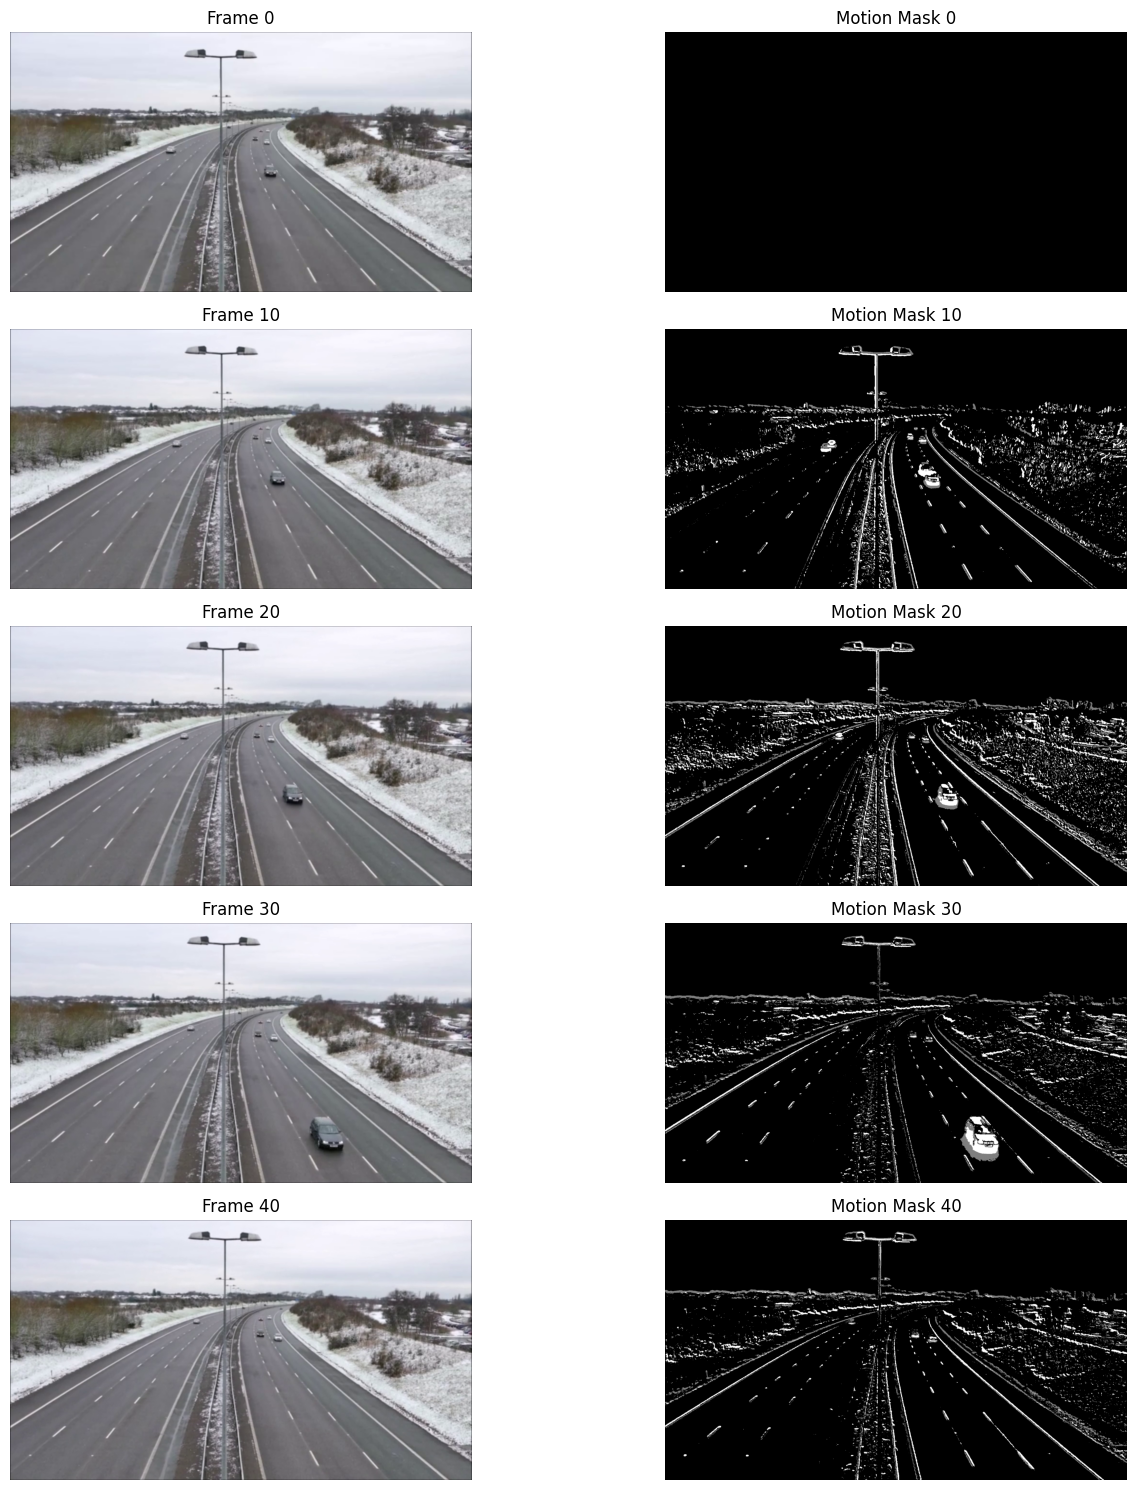

In [12]:
img_path = os.path.join(imagePath, "car.mp4")
cap = cv2.VideoCapture(img_path)

if cap.isOpened():
    subtractor = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
    
    frames_to_process = []
    masks = []
    
    # İlk 50 frame'i işle
    for i in range(50):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Arka plan modelini güncelle
        mask = subtractor.apply(frame, learningRate=0.01 if i < 20 else -1)
        
        # Her 10 frame'de bir kaydet (görselleştirme için)
        if i % 10 == 0:
            frames_to_process.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            masks.append(mask)
    
    cap.release()
    
    # Sonuçları görselleştir
    num_images = len(frames_to_process)
    if num_images > 0:
        plt.figure(figsize=(15, num_images * 3))
        
        for idx, (frame, mask) in enumerate(zip(frames_to_process, masks)):
            plt.subplot(num_images, 2, idx * 2 + 1)
            plt.imshow(frame)
            plt.title(f"Frame {idx * 10}")
            plt.axis('off')
            
            plt.subplot(num_images, 2, idx * 2 + 2)
            plt.imshow(mask, cmap='gray')
            plt.title(f"Motion Mask {idx * 10}")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No frames processed.")
else:
    print("Could not open video file.")

**Full Interactive Scripts:** For interactive video versions, see [`examples/05_manual_bg_subtraction.py`](examples/05_manual_bg_subtraction.py) and [`examples/06_mog2_bg_subtraction.py`](examples/06_mog2_bg_subtraction.py).

## 4. Skin Color Detection

Applications that use skin color properties (often in HSV) to identify and process human-like regions in an image or video.

### Skin Color Object Detection (Static Demo)
This is an interactive application. We show a representative static output here identifying skin-colored regions and their extreme points.

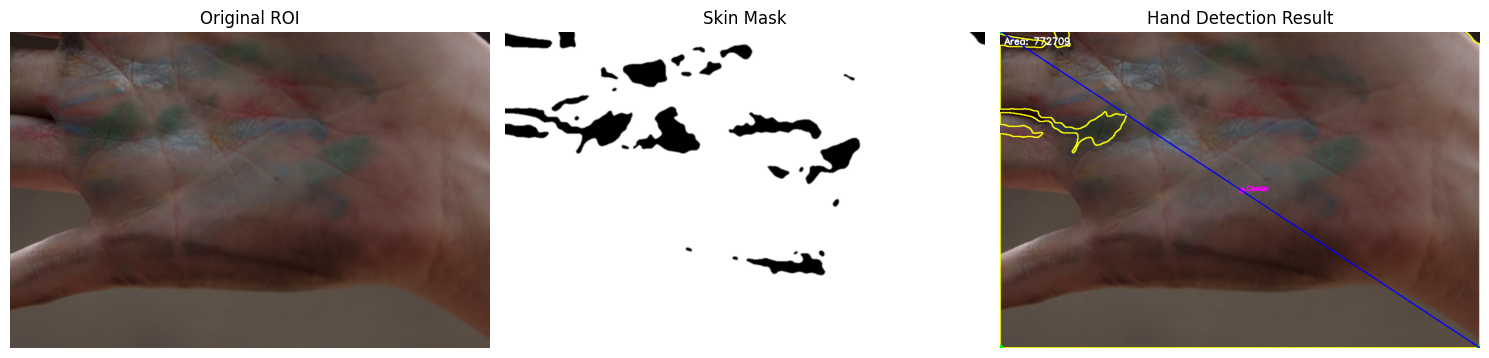

In [21]:
img_path = os.path.join(imagePath, "hand.mp4")  # El videosu olmalı
cap = cv2.VideoCapture(img_path)

if cap.isOpened():
    # Birkaç frame atla (daha iyi el pozisyonu için)
    for _ in range(30):
        cap.read()
    
    ret, frame = cap.read()
    cap.release()

    if ret and frame is not None:
        # Dinamik ROI boyutu
        height, width = frame.shape[:2]
        roi_y1, roi_y2 = int(height * 0.3), int(height * 0.8)
        roi_x1, roi_x2 = int(width * 0.3), int(width * 0.7)
        
        roi_frame = frame[roi_y1:roi_y2, roi_x1:roi_x2].copy()
        
        # Cilt rengi tespiti için HSV
        hsv = cv2.cvtColor(roi_frame, cv2.COLOR_BGR2HSV)
        
        # Genişletilmiş cilt rengi aralığı
        lower_skin1 = np.array([0, 20, 70], dtype=np.uint8)
        upper_skin1 = np.array([20, 255, 255], dtype=np.uint8)
        mask1 = cv2.inRange(hsv, lower_skin1, upper_skin1)
        
        # İkinci aralık (daha koyu cilt tonları)
        lower_skin2 = np.array([0, 40, 50], dtype=np.uint8)
        upper_skin2 = np.array([25, 255, 255], dtype=np.uint8)
        mask2 = cv2.inRange(hsv, lower_skin2, upper_skin2)
        
        # Maskeleri birleştir
        mask = cv2.bitwise_or(mask1, mask2)
        
        # Morfolojik işlemler - gürültü temizleme
        kernel_erode = np.ones((3, 3), np.uint8)
        kernel_dilate = np.ones((5, 5), np.uint8)
        
        mask = cv2.erode(mask, kernel_erode, iterations=1)
        mask = cv2.dilate(mask, kernel_dilate, iterations=2)
        mask = cv2.medianBlur(mask, 11)
        mask = cv2.GaussianBlur(mask, (5, 5), 0)
        
        # Konturları bul
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        result_frame = roi_frame.copy()
        
        if len(contours) > 0:
            # En büyük konturu al
            largest_contour = max(contours, key=cv2.contourArea)
            contour_area = cv2.contourArea(largest_contour)
            
            if contour_area > 500:  # Minimum alan eşiği
                # Konturu çiz
                cv2.drawContours(result_frame, [largest_contour], 0, (0, 255, 255), 2)
                
                # Uç noktaları bul
                extLeft = tuple(largest_contour[largest_contour[:, :, 0].argmin()][0])
                extRight = tuple(largest_contour[largest_contour[:, :, 0].argmax()][0])
                extTop = tuple(largest_contour[largest_contour[:, :, 1].argmin()][0])
                extBottom = tuple(largest_contour[largest_contour[:, :, 1].argmax()][0])
                
                # Merkez noktası
                M = cv2.moments(largest_contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    cv2.circle(result_frame, (cx, cy), 7, (255, 0, 255), -1)
                    cv2.putText(result_frame, "Center", (cx + 10, cy), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)
                
                # Uç noktaları işaretle
                cv2.circle(result_frame, extLeft, 7, (0, 255, 0), -1)
                cv2.circle(result_frame, extRight, 7, (0, 255, 0), -1)
                cv2.circle(result_frame, extTop, 7, (0, 255, 0), -1)
                cv2.circle(result_frame, extBottom, 7, (0, 255, 0), -1)
                
                # Etiketler
                cv2.putText(result_frame, "Left", (extLeft[0] - 40, extLeft[1]), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                cv2.putText(result_frame, "Right", (extRight[0] + 10, extRight[1]), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                cv2.putText(result_frame, "Top", (extTop[0], extTop[1] - 10), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                cv2.putText(result_frame, "Bottom", (extBottom[0], extBottom[1] + 20), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                
                # Üçgen çiz
                cv2.line(result_frame, extLeft, extTop, (255, 0, 0), 2)
                cv2.line(result_frame, extTop, extRight, (255, 0, 0), 2)
                cv2.line(result_frame, extRight, extLeft, (255, 0, 0), 2)
                
                # Bilgi metni
                cv2.putText(result_frame, f"Area: {int(contour_area)}", (10, 30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        
        # Görselleştirme
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(roi_frame, cv2.COLOR_BGR2RGB))
        plt.title("Original ROI")
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Skin Mask")
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        plt.title("Hand Detection Result")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("Could not load frame.")
else:
    print("Could not open video file.")

**Full Interactive Scripts:** For interactive webcam versions, see [`examples/07_skin_color_object_detection.py`](examples/07_skin_color_object_detection.py) and [`examples/08_hand_gesture_recognition.py`](examples/08_hand_gesture_recognition.py).

## 5. Object Tracking Simulation

Simple demonstrations of tracking a specific object or feature within a video stream.

### Pupil Tracking Simulation (Static Demo)
This is an interactive application. We show a representative static output here.

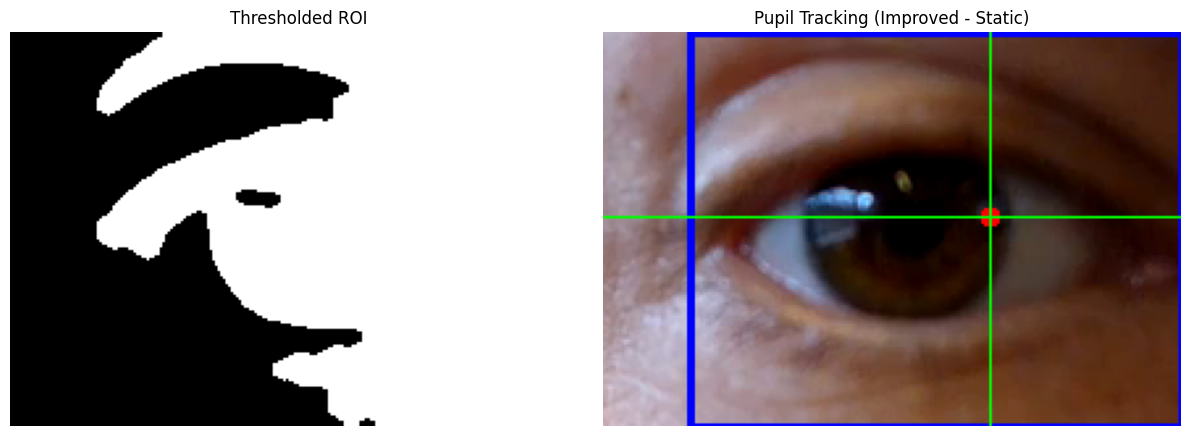

In [ ]:
img_path = os.path.join(imagePath, "eye_motion.mp4")
cap = cv2.VideoCapture(img_path)
ret, frame = cap.read()
cap.release()

if ret and frame is not None:

    # --- ROI (göz bölgesi) ---
    roi = frame[80:230, 230:450].copy()
    h_roi, w_roi = roi.shape[:2]

    # --- Ön işleme ---
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Otsu threshold (karanlık pupil için ters)
    _, thresh = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    # Gürültü temizleme
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

    # --- Kontur bul ---
    contours, _ = cv2.findContours(
        thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    if contours:
        pupil_cnt = max(contours, key=cv2.contourArea)

        if cv2.contourArea(pupil_cnt) > 80:
            # Pupil merkezi (moment ile)
            M = cv2.moments(pupil_cnt)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])

                # Bounding box (görselleştirme için)
                x, y, w, h = cv2.boundingRect(pupil_cnt)
                cv2.rectangle(roi, (x, y), (x+w, y+h), (255, 0, 0), 2)

                # Merkez noktası
                cv2.circle(roi, (cx, cy), 4, (0, 0, 255), -1)

                # Referans çizgileri
                cv2.line(roi, (cx, 0), (cx, h_roi), (0, 255, 0), 1)
                cv2.line(roi, (0, cy), (w_roi, cy), (0, 255, 0), 1)

    # --- Gösterim ---
    roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(thresh, cmap="gray")
    axes[0].set_title("Thresholded ROI")
    axes[0].axis("off")

    axes[1].imshow(roi_rgb)
    axes[1].set_title("Pupil Tracking (Improved - Static)")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

else:
    print("Could not load frame for static demo.")


**Full Interactive Script:** For the interactive video version, see [`examples/09_pupil_tracking_simulation.py`](examples/09_pupil_tracking_simulation.py).

## 6. Image Comparison

A technique to compare two images and highlight their differences.

### Detecting Image Differences (Static Demo)
Detects and highlights differences between two static images.

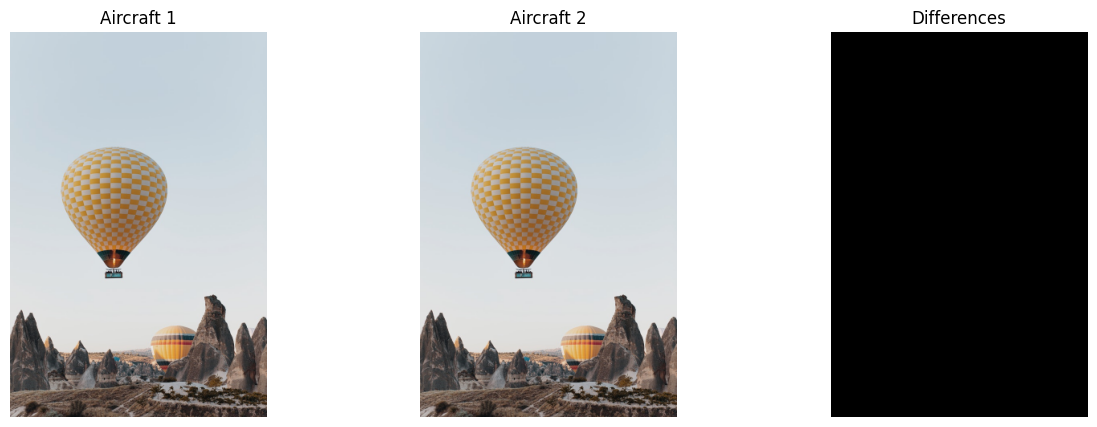

In [24]:
path1 = os.path.join(imagePath, "aircraft.jpg")
path2 = os.path.join(imagePath, "aircraft_compare.jpg")

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

if img1 is None or img2 is None:
    print("Error: Could not load one or both aircraft images.")
else:
    target_size = (320, 480)
    img1_resized = cv2.resize(img1, target_size)
    img2_resized = cv2.resize(img2, target_size)

    gray1 = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

    diff = cv2.absdiff(gray1, gray2)
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    img1_rgb = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img1_rgb)
    plt.title("Aircraft 1")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img2_rgb)
    plt.title("Aircraft 2")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(thresh, cmap='gray')
    plt.title("Differences")
    plt.axis('off')
    plt.show()

**Full Script:** For the interactive version, see [`examples/10_image_comparison.py`](examples/10_image_comparison.py).